Image classification using Pre-trained

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [4]:
def plot_metrics(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend()
    plt.show()

c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3717 - loss: 1.7499 - val_accuracy: 0.4884 - val_loss: 1.4417
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5237 - loss: 1.3412 - val_accuracy: 0.5476 - val_loss: 1.2693
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5755 - loss: 1.2083 - val_accuracy: 0.5873 - val_loss: 1.1674
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6091 - loss: 1.1052 - val_accuracy: 0.5987 - val_loss: 1.1291
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6341 - loss: 1.0332 - val_accuracy: 0.6119 - val_loss: 1.1145
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6571 - loss: 0.9815 - val_accuracy: 0.6212 - val_loss: 1.0847
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6756 - loss: 0.9241 - val_accuracy: 0.5993 - val_loss: 1.1615
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6960 - loss: 0.8683 - val_accuracy

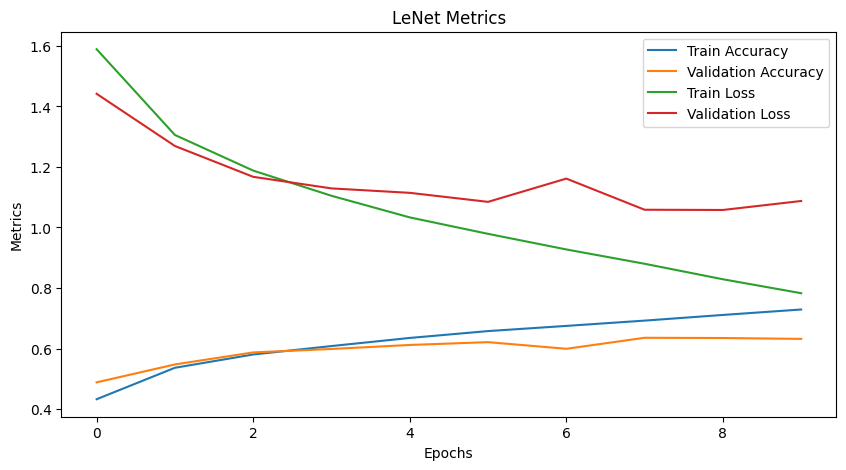

In [5]:
def lenet_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(6, kernel_size=5, activation='tanh', input_shape=input_shape, padding='same'),
        MaxPooling2D(pool_size=2),
        Conv2D(16, kernel_size=5, activation='tanh'),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Train LeNet
lenet = lenet_model((32, 32, 3), num_classes)
lenet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_lenet = lenet.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64)
lenet_test_loss, lenet_test_acc = lenet.evaluate(x_test, y_test)
print(f"LeNet Test Accuracy: {lenet_test_acc * 100:.2f}%")

# Plot metrics for LeNet
plot_metrics(history_lenet, 'LeNet Metrics')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 318ms/step - accuracy: 0.3829 - loss: 1.7429 - val_accuracy: 0.5446 - val_loss: 1.2882
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.5313 - loss: 1.3440 - val_accuracy: 0.5732 - val_loss: 1.2194
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 315ms/step - accuracy: 0.5574 - loss: 1.2727 - val_accuracy: 0.5808 - val_loss: 1.1893
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 306ms/step - accuracy: 0.5754 - loss: 1.2086 - val_accuracy: 0.5943 - val_loss: 1.1764
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 223s 356ms/step - accuracy: 0.5823 - loss: 1.1940 - val_accuracy: 0.5926 - val_loss: 1.1554
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 337ms/step - accuracy: 0.5932 - loss: 1.1663 - val_accuracy: 0.6007 - val_loss: 1.1452
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 270s 431ms/step - accuracy: 0.5962 - loss: 1.1537 - val_accuracy: 0.6004 - val_loss: 1.1513
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 320ms/step - accuracy: 0.6077 -

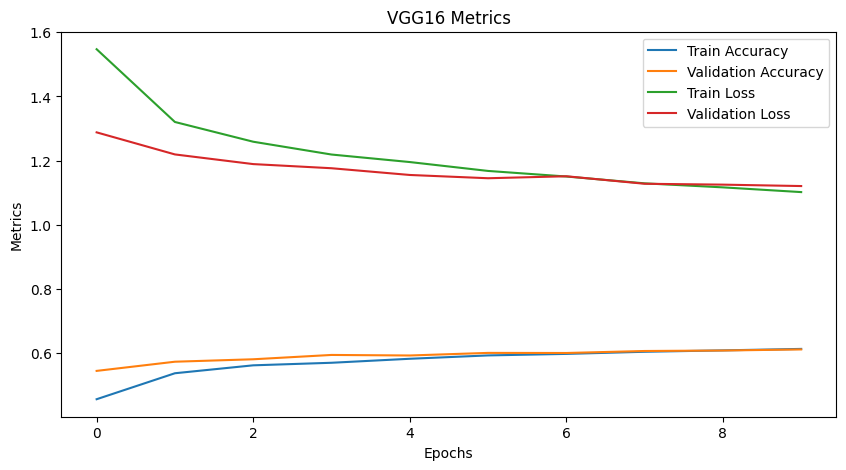

In [6]:
def vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Train VGG16
vgg16 = vgg16_model((32, 32, 3), num_classes)
vgg16.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg16 = vgg16.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64)
vgg16_test_loss, vgg16_test_acc = vgg16.evaluate(x_test, y_test)
print(f"VGG16 Test Accuracy: {vgg16_test_acc * 100:.2f}%")

# Plot metrics for VGG16
plot_metrics(history_vgg16, 'VGG16 Metrics')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for LeNet
              precision    recall  f1-score   support

           0       0.65      0.71      0.68      1000
           1       0.74      0.69      0.72      1000
           2       0.51      0.50      0.51      1000
           3       0.46      0.41      0.43      1000
           4       0.56      0.57      0.56      1000
           5       0.56      0.48      0.52      1000
           6       0.62      0.80      0.70      1000
           7       0.81      0.60      0.69      1000
           8       0.71      0.79      0.74      1000
           9       0.65      0.70      0.68      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000



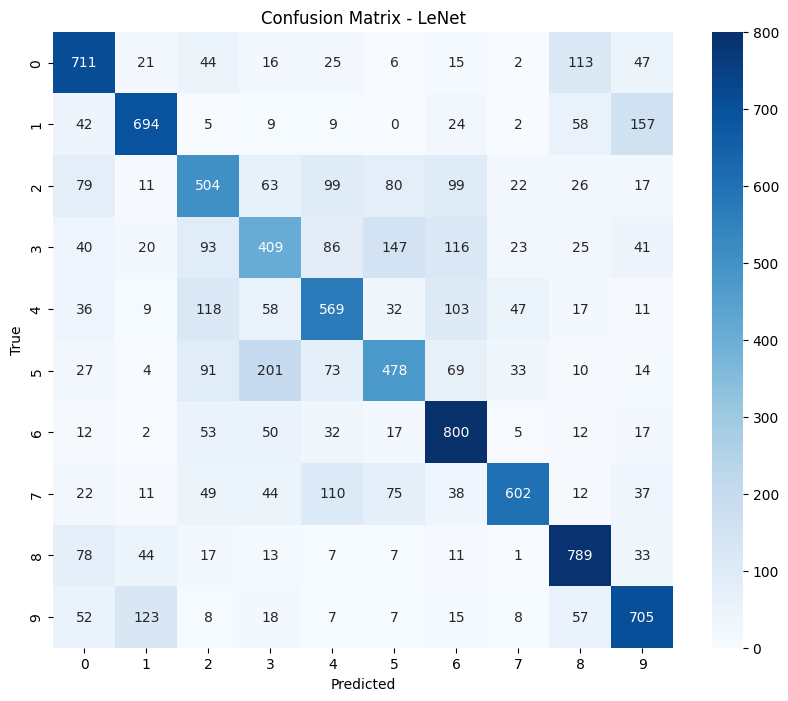

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step
Classification Report for VGG16
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      1000
           1       0.63      0.71      0.67      1000
           2       0.61      0.41      0.49      1000
           3       0.42      0.47      0.44      1000
           4       0.60      0.49      0.54      1000
           5       0.52      0.54      0.53      1000
           6       0.57      0.73      0.64      1000
           7       0.71      0.64      0.67      1000
           8       0.66      0.79      0.72      1000
           9       0.63      0.62      0.63      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



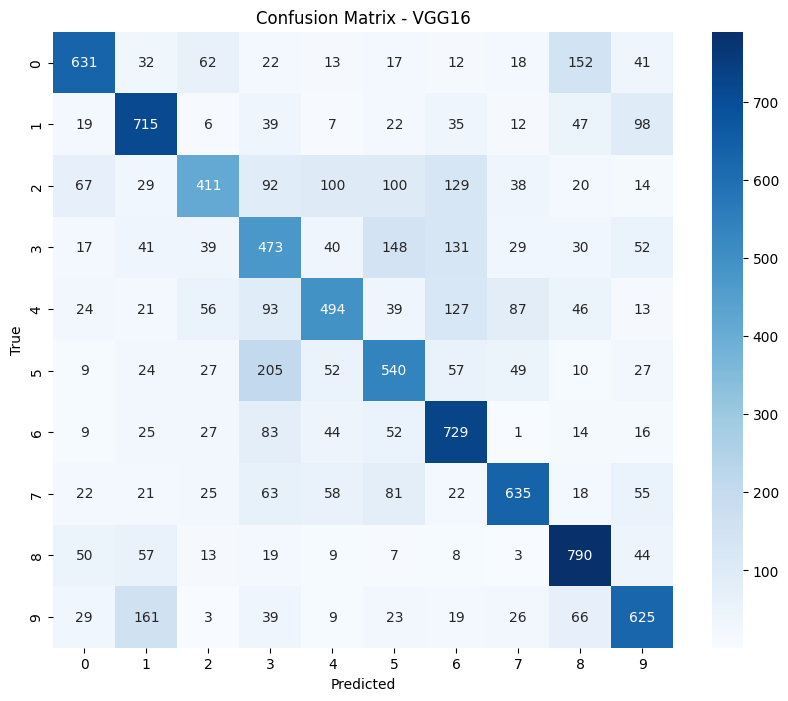

In [7]:
def evaluate_model(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    y_pred_classes = tf.argmax(y_pred, axis=1)
    y_true_classes = tf.argmax(y_test, axis=1)
    print(f"Classification Report for {model_name}")
    print(classification_report(y_true_classes, y_pred_classes))
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate LeNet
evaluate_model(lenet, x_test, y_test, "LeNet")

# Evaluate VGG16
evaluate_model(vgg16, x_test, y_test, "VGG16")

In [8]:
print(f"Comparison of Test Accuracies:")
print(f"LeNet: {lenet_test_acc * 100:.2f}%")
print(f"VGG16: {vgg16_test_acc * 100:.2f}%")

Comparison of Test Accuracies:
LeNet: 62.61%
VGG16: 60.43%
